**Q1. What is data encoding? How is it useful in data science?**

Data encoding is the process of converting data from one format or representation into another, typically with the goal of making the data suitable for specific tasks, such as storage, transmission, or analysis. In data science, data encoding is a crucial step because it helps prepare data for machine learning algorithms, statistical analysis, and other data processing tasks.

Let's break down data encoding using a simple example:

Problem: We have a dataset of categorical data, where the categories are represented as text labels. However, many machine learning algorithms require numerical data as input. We need to encode the categorical data into numerical values for analysis.

Example:
Suppose we have a dataset of fruits with a categorical feature "Fruit Type" and three possible categories: "Apple," "Banana," and "Orange." We want to encode these categories into numerical values.

**Q2. What is nominal encoding? Provide an example of how you would use it in a real-world scenario.**

Nominal encoding is a technique of converting categorical data into numerical data. Categorical data are data that have different categories or groups, such as gender, color, or city. Nominal encoding assigns a unique number to each category, without implying any order or rank among them. For example, if we have a feature called "color" with three possible values: "red", "green", and "blue", we can use nominal encoding to assign them numbers like 1, 2, and 3 respectively. This way, we can use the numbers as input for machine learning algorithms that require numerical data.

One example of how to use nominal encoding in a real-world scenario is when we want to analyze the preferences of moviegoers based on their favorite genres. Suppose we have a dataset that contains information about the movies and the genres that people liked them. We can use nominal encoding to transform the genre names into numbers, so that we can compare and cluster them based on their popularity or ratings. For instance, if we have a genre called "action", we can assign it the number 1; if we have a genre called "comedy", we can assign it the number 2; and so on. Then, we can use these numbers as input for a machine learning model that predicts the box office revenue of movies based on their genres.

In [1]:
!pip install category_encoders

In [2]:
# Import the necessary libraries
import pandas as pd

# Create the dataset with the "Favorite Color" feature
data = {'Name': ['Alice', 'Bob', 'Charlie', 'David'],
        'Favorite Color': ['Red', 'Blue', 'Green', 'Red']}
df = pd.DataFrame(data)
print("The Original DataFrame:")
print(df)

# Define the encoding mapping based on unique values in "Favorite Color" column
unique_colors = df['Favorite Color'].unique()
color_encoding = {color: index + 1 for index, color in enumerate(unique_colors)}

# Apply the encoding to the "Favorite Color" column
df['Number'] = df['Favorite Color'].map(color_encoding)

# Print the updated DataFrame
print("The Updated DataFrame with Nominal (Integer) Encoding:")
print(df)

The Original DataFrame:
      Name Favorite Color
0    Alice            Red
1      Bob           Blue
2  Charlie          Green
3    David            Red
The Updated DataFrame with Nominal (Integer) Encoding:
      Name Favorite Color  Number
0    Alice            Red       1
1      Bob           Blue       2
2  Charlie          Green       3
3    David            Red       1


**Q3. In what situations is nominal encoding preferred over one-hot encoding? Provide a practical example.**

`Nominal encoding` is preferred over one-hot encoding when the categorical features do not have any order or ranking. For example, if we have a feature that represents the color of a shirt, such as red, blue, or green, we can use nominal encoding to assign each color a unique integer value, such as 1, 2, or 3. This way, we can preserve the original meaning of the feature without creating new variables for each color.

`One-hot encoding` is preferred over nominal encoding when the categorical features have an order or ranking. For example, if we have a feature that represents the level of education, such as high school, college, or graduate school, we can use one-hot encoding to create new variables for each level, such as high_school_1, high_school_2, etc. This way, we can capture the difference between the levels and avoid implying any hierarchy or magnitude.

`Nominal encoding` is one of the simplest and most common ways of encoding categorical data. However, it has some limitations and drawbacks. 
- For example, nominal encoding does not capture any order or hierarchy among the categories.
- it also does not allow us to perform any statistical analysis or visualization based on the categories. 
- Therefore, depending on the type and purpose of our data, we may need to use other techniques of encoding categorical data, such as ordinal encoding or one-hot encoding.

`If we try to convert the above mentioned data frame into OneHotEncoded dataset:`

In [3]:
# Import necessary libraries
import pandas as pd
import category_encoders as ce

# Create the dataset with the "Favorite Color" feature
data = {'Name': ['Alice', 'Bob', 'Charlie', 'David'],
        'Favorite Color': ['Red', 'Blue', 'Green', 'Red']}
df = pd.DataFrame(data)
print("The Original DataFrame:")
print(df)

# Count the occurrences of each unique category in the "Favorite Color" column
category_counts = df['Favorite Color'].value_counts()

# Initialize the OneHotEncoder from category_encoders
encoder = ce.OneHotEncoder(cols=['Favorite Color'],return_df=True, use_cat_names=True)

# Fit and transform the data to perform one-hot encoding
encoded_data = encoder.fit_transform(df)

print("The Category Counts:")
print(category_counts)

print("The Encoded Data:")
print(encoded_data)

The Original DataFrame:
      Name Favorite Color
0    Alice            Red
1      Bob           Blue
2  Charlie          Green
3    David            Red
The Category Counts:
Red      2
Blue     1
Green    1
Name: Favorite Color, dtype: int64
The Encoded Data:
      Name  Favorite Color_Red  Favorite Color_Blue  Favorite Color_Green
0    Alice                   1                    0                     0
1      Bob                   0                    1                     0
2  Charlie                   0                    0                     1
3    David                   1                    0                     0


- Now, our "Favorite Color" feature has been successfully one-hot encoded into binary columns. Each category is represented by a binary column, where 1 indicates the presence of that color, and 0 indicates its absence.
- In this example, we've used one-hot encoding to convert nominal categorical data into a format suitable for data analysis and machine learning. This approach preserves the independence of categories and ensures that no misleading order is imposed on the data, making it suitable for a wide range of applications.

But if we have high dimensional dataset with 1000 of unique feature, then it will be more useful if we use `Binary Encoding`.

**Binary Encoding** is a method used to encode categorical data by representing each category with binary code. It's particularly useful when dealing with high-cardinality categorical features. In binary encoding, each category is converted into a binary number, and these binary digits are stored in separate columns.

**Scenario**: Let's say we have a dataset of students with a "Favorite Animal" feature, which has categories like "Cat," "Dog," and "Fish." We will use binary encoding to represent these categories as binary code.

`Here's a step-by-step explanation with Python code:`

In [4]:
# Import necessary libraries
import pandas as pd
import category_encoders as ce

# Create the dataset with the "Favorite Color" feature
data = {'Name': ['Alice', 'Bob', 'Charlie', 'David'],
        'Favorite Color': ['Red', 'Blue', 'Green', 'Red']}
df = pd.DataFrame(data)
print("The Original DataFrame:")
print(df)

# Count the occurrences of each unique category in the "Favorite Color" column
category_counts = df['Favorite Color'].value_counts()

# Initialize the OneHotEncoder from category_encoders
encoder = ce.BinaryEncoder(cols=['Favorite Color'],return_df=True)

# Fit and transform the data to perform one-hot encoding
encoded_data = encoder.fit_transform(df)

print("The Category Counts:")
print(category_counts)

print("The Encoded Data:")
print(encoded_data)

The Original DataFrame:
      Name Favorite Color
0    Alice            Red
1      Bob           Blue
2  Charlie          Green
3    David            Red
The Category Counts:
Red      2
Blue     1
Green    1
Name: Favorite Color, dtype: int64
The Encoded Data:
      Name  Favorite Color_0  Favorite Color_1
0    Alice                 0                 1
1      Bob                 1                 0
2  Charlie                 1                 1
3    David                 0                 1


- In this example, we've used binary encoding to convert the "Favorite Color" feature into binary columns.
- Each category is represented by a binary code, where `01` indicates the presence of red color, and `10` indicates blue and `11` indicates green color. 
- Binary encoding is especially helpful when dealing with categorical features with a large number of categories and avoids the high dimensionality of one-hot encoding.
- Here, we use two columns to represent 3 unique colors. Similarly, we can use $n$ columns to represent $2^n$ unique features in any datsets.

**Q4. Suppose you have a dataset containing categorical data with 5 unique values. Which encoding technique would you use to transform this data into a format suitable for machine learning algorithms? Explain why you made this choice.**

To transform categorical data with 5 unique values into a format suitable for machine learning algorithms, we can use `one-hot encoding`. `One-hot encoding` is a popular technique because it helps prevent the model from assuming any ordinal relationship between the categories and treats them as independent binary features. It does not capture any order or hierarchy among the categories.

**Q5. In a machine learning project, you have a dataset with 1000 rows and 5 columns. Two of the columns are categorical, and the remaining three columns are numerical. If you were to use nominal encoding to transform the categorical data, how many new columns would be created? Show your calculations.**

In [5]:
# Import the necessary libraries
import pandas as pd
import numpy as np

# Create random data for the DataFrame
data = {
    'Category1': np.random.choice(['A', 'B', 'C'], size=1000),  # Categorical data with 3 categories (A, B, C)
    'Category2': np.random.choice(['X', 'Y', 'Z'], size=1000),  # Categorical data with 3 categories (X, Y, Z)
    'Numeric1': np.random.rand(1000),  # Numerical data
    'Numeric2': np.random.rand(1000),  # Numerical data
    'Numeric3': np.random.rand(1000)   # Numerical data
}

# Create the DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the DataFrame
print("The Original DataFrame:")
print(df)

# Define the encoding mapping based on unique values in "Category1" and "Category2" columns
unique_categories1 = df['Category1'].unique()
unique_categories2 = df['Category2'].unique()

# Create encoding dictionaries for Category1 and Category2
category1_encoding = {category: index + 1 for index, category in enumerate(unique_categories1)}
category2_encoding = {category: index + 1 for index, category in enumerate(unique_categories2)}

# Apply the encoding to the "Category1" and "Category2" columns
df['Category1_encoded'] = df['Category1'].map(category1_encoding)
df['Category2_encoded'] = df['Category2'].map(category2_encoding)

# Print the updated DataFrame
print("\t")
print("The Updated DataFrame with Nominal (Integer) Encoding:")
print(df.head)

The Original DataFrame:
    Category1 Category2  Numeric1  Numeric2  Numeric3
0           C         Y  0.068449  0.118769  0.634087
1           A         X  0.517702  0.240253  0.528022
2           B         X  0.531279  0.919290  0.892601
3           A         Z  0.930639  0.490202  0.548854
4           C         X  0.015296  0.547068  0.863128
..        ...       ...       ...       ...       ...
995         C         Z  0.084524  0.364734  0.971368
996         C         Y  0.102427  0.785184  0.569116
997         B         Z  0.968585  0.685626  0.426589
998         B         Y  0.567177  0.450070  0.052907
999         C         Z  0.239881  0.731408  0.445955

[1000 rows x 5 columns]
	
The Updated DataFrame with Nominal (Integer) Encoding:
<bound method NDFrame.head of     Category1 Category2  Numeric1  Numeric2  Numeric3  Category1_encoded  \
0           C         Y  0.068449  0.118769  0.634087                  1   
1           A         X  0.517702  0.240253  0.528022           

**Q6. You are working with a dataset containing information about different types of animals, including their species, habitat, and diet. Which encoding technique would you use to transform the categorical data into a format suitable for machine learning algorithms? Justify your answer.**

To transform categorical data into a format suitable for machine learning algorithms, one commonly used technique is one-hot encoding. One-hot encoding converts categorical variables into binary vectors that can be used as input to machine learning models. It is particularly useful when dealing with nominal (unordered) categorical data, such as species, habitat, or diet types of animals.

I will provide a detailed explanation and example using Python code and Matplotlib visualizations to illustrate the concept step by step.

Let's say you have a dataset with information about different animals:

| Animal    | Species   | Habitat    | Diet        |
|-----------|-----------|------------|-------------|
| Lion      | Mammal    | Savannah   | Carnivore   |
| Penguin   | Bird      | Ice        | Carnivore   |
| Elephant  | Mammal    | Forest     | Herbivore   |
| Giraffe   | Mammal    | Savannah   | Herbivore   |
| Dolphin   | Mammal    | Ocean      | Carnivore   |

We want to one-hot encode the categorical columns: 'Species', 'Habitat', and 'Diet'.

The Original DataFRame:
     Animal Species   Habitat       Diet
0      Lion  Mammal  Savannah  Carnivore
1   Penguin    Bird       Ice  Carnivore
2  Elephant  Mammal    Forest  Herbivore
3   Giraffe  Mammal  Savannah  Herbivore
4   Dolphin  Mammal     Ocean  Carnivore
The Encoded Data:
[[0. 1. 0. 0. 0. 1. 1. 0.]
 [1. 0. 0. 1. 0. 0. 1. 0.]
 [0. 1. 1. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 1. 0. 1.]
 [0. 1. 0. 0. 1. 0. 1. 0.]]


<Figure size 1000x600 with 0 Axes>

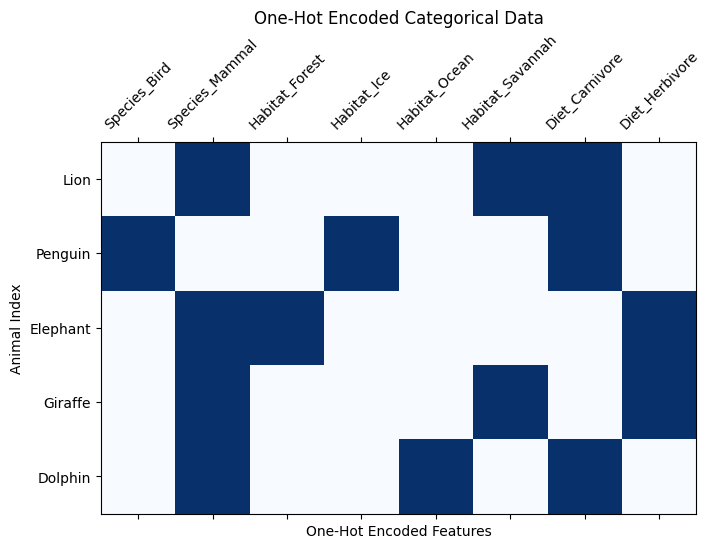

In [6]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# Create a DataFrame with the animal data
data = {
    'Animal': ['Lion', 'Penguin', 'Elephant', 'Giraffe', 'Dolphin'],
    'Species': ['Mammal', 'Bird', 'Mammal', 'Mammal', 'Mammal'],
    'Habitat': ['Savannah', 'Ice', 'Forest', 'Savannah', 'Ocean'],
    'Diet': ['Carnivore', 'Carnivore', 'Herbivore', 'Herbivore', 'Carnivore']
}

df = pd.DataFrame(data)
print("The Original DataFRame:")
print(df)

# Initialize the OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the categorical columns
encoded_data = encoder.fit_transform(df[['Species', 'Habitat', 'Diet']]).toarray()
print("The Encoded Data:")
print(encoded_data)

# Create a figure and plot the one-hot encoded data using matshow
plt.figure(figsize=(10, 6))
plt.matshow(encoded_data, cmap='Blues')
plt.xlabel('One-Hot Encoded Features')
plt.ylabel('Animal Index')
plt.title('One-Hot Encoded Categorical Data')
plt.xticks(range(encoded_data.shape[1]), encoder.get_feature_names_out(['Species', 'Habitat', 'Diet']), rotation=45)
plt.yticks(range(encoded_data.shape[0]), df['Animal'])
plt.show()


Now, let's take a look at the one-hot encoded data:

- Now, each categorical variable has been converted into binary columns, where 1 represents the presence of a category, and 0 represents its absence. This one-hot encoded data can be used as input to machine learning algorithms, allowing you to work with categorical data effectively.
- The visualization will show a binary matrix where each column represents a category, and each row corresponds to an animal.
- This approach is essential for machine learning models as they typically require numerical input. One-hot encoding ensures that we represent categorical data in a way that preserves their individuality and does not introduce any ordinal relationships between categories.

**Q7.You are working on a project that involves predicting customer churn for a telecommunications company. You have a dataset with 5 features, including the customer's gender, age, contract type, monthly charges, and tenure. Which encoding technique(s) would you use to transform the categorical data into numerical data? Provide a step-by-step explanation of how you would implement the encoding.**

In [7]:
import pandas as pd
import category_encoders as ce

# Sample data
data = {
    'gender': ['Male', 'Female', 'Male', 'Female'],
    'age': [25, 30, 22, 35],
    'contract_type': ['Month-to-Month', 'One Year', 'Month-to-Month', 'Two Year'],
    'monthly_charges': [50.0, 65.0, 45.0, 80.0],
    'tenure': [6, 12, 3, 24]
}

# Create a DataFrame
df = pd.DataFrame(data)
print("The Original DataFRame:")
print(df)
print("\t")

# Count the occurrences of each unique category in the "gender" and "contract_type" columns
category_counts_gender = df['gender'].value_counts()
category_counts_contract_type = df['contract_type'].value_counts()

# Initialize the OneHotEncoder from category_encoders
encoder = ce.OneHotEncoder(cols=['gender', 'contract_type'], return_df=True, use_cat_names=True)

# Fit and transform the data to perform one-hot encoding
encoded_data = encoder.fit_transform(df)

print("The Category Counts for 'gender':")
print(category_counts_gender)
print("\t")

print("The Category Counts for 'contract_type':")
print(category_counts_contract_type)
print("\t")

print("The Encoded Data:")
print(encoded_data)

The Original DataFRame:
   gender  age   contract_type  monthly_charges  tenure
0    Male   25  Month-to-Month             50.0       6
1  Female   30        One Year             65.0      12
2    Male   22  Month-to-Month             45.0       3
3  Female   35        Two Year             80.0      24
	
The Category Counts for 'gender':
Male      2
Female    2
Name: gender, dtype: int64
	
The Category Counts for 'contract_type':
Month-to-Month    2
One Year          1
Two Year          1
Name: contract_type, dtype: int64
	
The Encoded Data:
   gender_Male  gender_Female  age  contract_type_Month-to-Month  \
0            1              0   25                             1   
1            0              1   30                             0   
2            1              0   22                             1   
3            0              1   35                             0   

   contract_type_One Year  contract_type_Two Year  monthly_charges  tenure  
0                       0         